In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [2]:
# Load Participant_Status table
cleaned_df = pd.read_csv('/home/mrudula/MLPOPS/outputs/final_cleaned.csv')

In [3]:
cleaned_df.info()

cleaned_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3737 entries, 0 to 3736
Data columns (total 94 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Participant_ID  3737 non-null   int64  
 1   COHORT          3737 non-null   int64  
 2   ENROLL_DATE     3737 non-null   object 
 3   ENROLL_AGE      3737 non-null   float64
 4   ENRLPRKN        3197 non-null   float64
 5   ENRLSRDC        3197 non-null   float64
 6   ENRLHPSM        3737 non-null   int64  
 7   ENRLRBD         3737 non-null   int64  
 8   ENRLSNCA        3737 non-null   int64  
 9   ENRLGBA         3737 non-null   int64  
 10  SEX             3737 non-null   int64  
 11  CHLDBEAR        1602 non-null   float64
 12  SAAMethod       1202 non-null   object 
 13  SAA_Status      1202 non-null   object 
 14  SAA_Type        577 non-null    object 
 15  InstrumentRep1  1202 non-null   float64
 16  NUPSOURC        3734 non-null   float64
 17  NP1COG          3735 non-null   f

,Participant_ID,COHORT,ENROLL_DATE,ENROLL_AGE,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLSNCA,ENRLGBA,...,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
0,3000,2,2011-02-01,69.1,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3001,1,2011-03-01,65.1,0.0,1.0,0,0,0,0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
2,3002,1,2011-03-01,67.6,0.0,1.0,0,0,0,0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
3,3003,1,2011-04-01,56.7,0.0,1.0,0,0,0,0,...,0.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN
4,3004,2,2011-04-01,59.4,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
cleaned_df.describe()

,Participant_ID,COHORT,ENROLL_AGE,ENRLPRKN,ENRLSRDC,ENRLHPSM,ENRLRBD,ENRLSNCA,ENRLGBA,SEX,...,NP4OFF,NP4OFFDEN,NP4OFFNUM,NP4OFFPCT,NP4FLCTI,NP4FLCTX,NP4DYSTN,NP4DYSTNDEN,NP4DYSTNNUM,NP4DYSTNPCT
count,3737.000000,3737.000000,3737.000000,3197.000000,3197.000000,3737.000000,3737.000000,3737.000000,3737.000000,3737.000000,...,1221.000000,460.000000,459.000000,453.000000,1221.000000,1221.000000,1221.000000,460.000000,459.000000,97.000000
mean,140068.524752,2.700294,64.705941,0.003754,0.277448,0.300241,0.119882,0.011507,0.073588,0.548033,...,0.729730,0.747826,16.119826,4.600442,0.571663,0.672400,0.433251,0.084783,1.272331,8.268041
std,103273.364100,1.418402,8.815350,0.061160,0.447809,0.458424,0.324867,0.106664,0.261135,0.497754,...,7.077719,2.643176,2.484190,16.082110,6.464086,7.074368,5.785922,0.743444,3.809021,23.023319
min,3000.000000,1.000000,26.400000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42452.000000,1.000000,60.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,140742.000000,4.000000,65.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,229247.000000,4.000000,70.500000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,402314.000000,4.000000,89.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,101.000000,18.000000,20.000000,100.000000,101.000000,101.000000,101.000000,14.000000,19.000000,100.000000


In [5]:
pd.set_option('display.max_rows', None) 

cleaned_df.isnull().sum()

Participant_ID       0
COHORT               0
ENROLL_DATE          0
ENROLL_AGE           0
ENRLPRKN           540
ENRLSRDC           540
ENRLHPSM             0
ENRLRBD              0
ENRLSNCA             0
ENRLGBA              0
SEX                  0
CHLDBEAR          2135
SAAMethod         2535
SAA_Status        2535
SAA_Type          3160
InstrumentRep1    2535
NUPSOURC             3
NP1COG               2
NP1HALL              2
NP1DPRS              2
NP1ANXS              2
NP1APAT              2
NP1DDS               2
NP1SLPN              2
NP1SLPD              2
NP1PAIN              3
NP1URIN              3
NP1CNST              2
NP1LTHD              2
NP1FATG              2
NP2SPCH              2
NP2SALV              3
NP2SWAL              3
NP2EAT               3
NP2DRES              3
NP2HYGN              4
NP2HWRT              4
NP2HOBB              4
NP2TURN              3
NP2TRMR              3
NP2RISE              3
NP2WALK              3
NP2FREZ              3
NP3SPCH    

In [6]:
target_col = cleaned_df['COHORT']
cleaned_df.drop(columns=['COHORT'], inplace=True)

In [7]:

# Total number of rows to calculate missing value percentages
total_rows = cleaned_df.shape[0]

threshold = 0.5
cols_to_drop = [col for col in cleaned_df.columns if cleaned_df[col].isnull().mean() > threshold]
df = cleaned_df.drop(columns=cols_to_drop)
print(f"Dropped columns with > 50% missing values: {cols_to_drop}")



Dropped columns with > 50% missing values: ['CHLDBEAR', 'SAAMethod', 'SAA_Status', 'SAA_Type', 'InstrumentRep1', 'DYSKIRAT', 'NP4WDYSK', 'NP4WDYSKDEN', 'NP4WDYSKNUM', 'NP4WDYSKPCT', 'NP4DYSKI', 'NP4OFF', 'NP4OFFDEN', 'NP4OFFNUM', 'NP4OFFPCT', 'NP4FLCTI', 'NP4FLCTX', 'NP4DYSTN', 'NP4DYSTNDEN', 'NP4DYSTNNUM', 'NP4DYSTNPCT']


In [8]:
# Example: Setting a threshold of unique values to identify potential categorical columns
threshold = 9  # Define a threshold based on knowledge of the data
categorical_cols = [col for col in df.columns if df[col].nunique() < threshold]
print(categorical_cols)

['ENRLPRKN', 'ENRLSRDC', 'ENRLHPSM', 'ENRLRBD', 'ENRLSNCA', 'ENRLGBA', 'SEX', 'NUPSOURC', 'NP1COG', 'NP1HALL', 'NP1DPRS', 'NP1ANXS', 'NP1APAT', 'NP1DDS', 'NP1SLPN', 'NP1SLPD', 'NP1PAIN', 'NP1URIN', 'NP1CNST', 'NP1LTHD', 'NP1FATG', 'NP2SPCH', 'NP2SALV', 'NP2SWAL', 'NP2EAT', 'NP2DRES', 'NP2HYGN', 'NP2HWRT', 'NP2HOBB', 'NP2TURN', 'NP2TRMR', 'NP2RISE', 'NP2WALK', 'NP2FREZ', 'NP3SPCH', 'NP3FACXP', 'NP3RIGN', 'NP3RIGRU', 'NP3RIGLU', 'NP3RIGRL', 'NP3RIGLL', 'NP3FTAPR', 'NP3FTAPL', 'NP3HMOVR', 'NP3HMOVL', 'NP3PRSPR', 'NP3PRSPL', 'NP3TTAPR', 'NP3TTAPL', 'NP3LGAGR', 'NP3LGAGL', 'NP3RISNG', 'NP3GAIT', 'NP3FRZGT', 'NP3PSTBL', 'NP3POSTR', 'NP3BRADY', 'NP3PTRMR', 'NP3PTRML', 'NP3KTRMR', 'NP3KTRML', 'NP3RTARU', 'NP3RTALU', 'NP3RTARL', 'NP3RTALL', 'NP3RTALJ', 'NP3RTCON', 'DYSKPRES', 'NHY']


In [9]:
for col in df.columns:
    unique_count = df[col].nunique()
    unique_values = df[col].unique()
    print(f"Column: {col}")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}\n")


Column: Participant_ID
  Number of unique values: 3737
  Unique values: [  3000   3001   3002 ... 386466 388122 402314]

Column: ENROLL_DATE
  Number of unique values: 160
  Unique values: ['2011-02-01' '2011-03-01' '2011-04-01' '2011-05-01' '2011-06-01'
 '2011-07-01' '2011-11-01' '2011-12-01' '2012-02-01' '2012-04-01'
 '2012-05-01' '2012-06-01' '2012-09-01' '2012-11-01' '2013-01-01'
 '2013-03-01' '2013-04-01' '2010-10-01' '2010-12-01' '2011-08-01'
 '2011-09-01' '2012-03-01' '2012-07-01' '2012-10-01' '2012-12-01'
 '2012-08-01' '2010-11-01' '2012-01-01' '2013-05-01' '2011-01-01'
 '2011-10-01' '2013-02-01' '2010-07-01' '2010-08-01' '2010-09-01'
 '2019-05-01' '2019-06-01' '2019-07-01' '2019-08-01' '2019-10-01'
 '2019-11-01' '2020-01-01' '2020-02-01' '2014-09-01' '2013-10-01'
 '2014-08-01' '2014-02-01' '2014-11-01' '2014-04-01' '2013-12-01'
 '2014-06-01' '2014-10-01' '2015-01-01' '2015-03-01' '2016-04-01'
 '2017-12-01' '2015-08-01' '2015-10-01' '2014-03-01' '2014-05-01'
 '2015-06-01' '2017

In [10]:
# Separate categorical and numerical columns for different preprocessing steps
numerical_cols = [col for col in df.columns if (col not in categorical_cols and df[col].dtype in ['int64', 'float64'])]


# a. Handle Missing Values
# Impute minimal missing values (< 5%) with median for numerical and mode for categorical data
numerical_cols_minimal_missing = [col for col in numerical_cols if df[col].isnull().mean() < 0.05]
categorical_cols_minimal_missing = [col for col in categorical_cols if df[col].isnull().mean() < 0.05]

# Impute numerical columns with the median
for col in numerical_cols_minimal_missing:
    median_value = df[col].median()  # Calculate median
    df[col] = df[col].fillna(median_value)  # Impute missing values with the median

# Impute categorical columns with the mode
for col in categorical_cols_minimal_missing:
    mode_value = df[col].mode()[0]  # Calculate mode (mode() returns a series, so take the first value)
    df[col] = df[col].fillna(mode_value)  # Impute missing values with the mode




In [11]:
df.isnull().sum()

Participant_ID      0
ENROLL_DATE         0
ENROLL_AGE          0
ENRLPRKN          540
ENRLSRDC          540
ENRLHPSM            0
ENRLRBD             0
ENRLSNCA            0
ENRLGBA             0
SEX                 0
NUPSOURC            0
NP1COG              0
NP1HALL             0
NP1DPRS             0
NP1ANXS             0
NP1APAT             0
NP1DDS              0
NP1SLPN             0
NP1SLPD             0
NP1PAIN             0
NP1URIN             0
NP1CNST             0
NP1LTHD             0
NP1FATG             0
NP2SPCH             0
NP2SALV             0
NP2SWAL             0
NP2EAT              0
NP2DRES             0
NP2HYGN             0
NP2HWRT             0
NP2HOBB             0
NP2TURN             0
NP2TRMR             0
NP2RISE             0
NP2WALK             0
NP2FREZ             0
NP3SPCH             0
NP3FACXP            0
NP3RIGN             0
NP3RIGRU            0
NP3RIGLU            0
NP3RIGRL            0
NP3RIGLL            0
NP3FTAPR            0
NP3FTAPL  

In [12]:
# Drop columns with high correlation (> 90%)
correlation_matrix = df[numerical_cols].corr().abs()  # Calculate absolute correlation matrix
upper_triangle = correlation_matrix.where(
    ~np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
)  # Get upper triangle of the correlation matrix
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.90)]
print(to_drop)


['Participant_ID', 'ENROLL_AGE']


In [13]:
print(df.dtypes) 

Participant_ID      int64
ENROLL_DATE        object
ENROLL_AGE        float64
ENRLPRKN          float64
ENRLSRDC          float64
ENRLHPSM            int64
ENRLRBD             int64
ENRLSNCA            int64
ENRLGBA             int64
SEX                 int64
NUPSOURC          float64
NP1COG            float64
NP1HALL           float64
NP1DPRS           float64
NP1ANXS           float64
NP1APAT           float64
NP1DDS            float64
NP1SLPN           float64
NP1SLPD           float64
NP1PAIN           float64
NP1URIN           float64
NP1CNST           float64
NP1LTHD           float64
NP1FATG           float64
NP2SPCH           float64
NP2SALV           float64
NP2SWAL           float64
NP2EAT            float64
NP2DRES           float64
NP2HYGN           float64
NP2HWRT           float64
NP2HOBB           float64
NP2TURN           float64
NP2TRMR           float64
NP2RISE           float64
NP2WALK           float64
NP2FREZ           float64
NP3SPCH           float64
NP3FACXP    

In [14]:

non_categorical_columns = [col for col in df.columns if col not in categorical_cols]


In [15]:
df.drop(columns=['Participant_ID', 'ENROLL_DATE'],inplace=True)
numerical_cols.remove('Participant_ID')


In [16]:

# For categorical columns, also apply label encoding and then one-hot encoding
one_hot_encoder = OneHotEncoder(handle_unknown='ignore')  # Drop first to avoid collinearity
scaler = StandardScaler()

In [17]:
numerical_pipeline = Pipeline(steps=[
    ('scaler', scaler)
])

# Categorical pipeline: Impute using KNN, then apply one-hot encoding
categorical_pipeline = Pipeline(steps=[
    ('knn_impute', KNNImputer(n_neighbors=5)),  # Apply KNN imputation to categorical columns with 5-50% missing values
    ('one_hot', one_hot_encoder)  # One-hot encode categorical columns
])

# Use ColumnTransformer to apply the different pipelines to numerical and categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_pipeline, numerical_cols),  # Apply numerical pipeline to numerical columns
        ('cat', categorical_pipeline, categorical_cols)  # Apply categorical pipeline to categorical columns
    ],
    remainder='passthrough'  # Keep other columns like date intact (without changes)
)


In [18]:
df_preprocessed = preprocessor.fit_transform(df)

# Retrieve column names after one-hot encoding and scaling
one_hot_feature_names = preprocessor.transformers_[1][1].named_steps['one_hot'].get_feature_names_out(categorical_cols)

# Combine column names
all_feature_names = numerical_cols + one_hot_feature_names.tolist() + [col for col in df.columns if col not in numerical_cols + categorical_cols]

# Convert the ndarray to pandas DataFrame with proper column names
df_preprocessed_df = pd.DataFrame(df_preprocessed.toarray(), columns=all_feature_names)

df_preprocessed_df.head()


,ENROLL_AGE,ENRLPRKN_0.0,ENRLPRKN_0.2,ENRLPRKN_1.0,ENRLSRDC_0.0,ENRLSRDC_0.2,ENRLSRDC_0.4,ENRLSRDC_0.6,ENRLSRDC_0.8,ENRLSRDC_1.0,...,NP3RTCON_4.0,NP3RTCON_101.0,DYSKPRES_0.0,DYSKPRES_1.0,NHY_0.0,NHY_1.0,NHY_2.0,NHY_3.0,NHY_4.0,NHY_101.0
0,0.498522,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.044707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.328342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,-0.908303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,-0.601978,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [19]:
# Append the target column to the preprocessed DataFrame
df_preprocessed_df['COHORT'] = target_col  # Make sure to replace 'target' with your actual target column name
df_preprocessed_df.head()

,ENROLL_AGE,ENRLPRKN_0.0,ENRLPRKN_0.2,ENRLPRKN_1.0,ENRLSRDC_0.0,ENRLSRDC_0.2,ENRLSRDC_0.4,ENRLSRDC_0.6,ENRLSRDC_0.8,ENRLSRDC_1.0,...,NP3RTCON_101.0,DYSKPRES_0.0,DYSKPRES_1.0,NHY_0.0,NHY_1.0,NHY_2.0,NHY_3.0,NHY_4.0,NHY_101.0,COHORT
0,0.498522,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,0.044707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.328342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.908303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,-0.601978,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [20]:
df_preprocessed_df.to_csv('Corrected_data.csv',index=False)

In [21]:
df_preprocessed_df.shape

(3737, 335)

In [22]:
df_preprocessed_df.head()

,ENROLL_AGE,ENRLPRKN_0.0,ENRLPRKN_0.2,ENRLPRKN_1.0,ENRLSRDC_0.0,ENRLSRDC_0.2,ENRLSRDC_0.4,ENRLSRDC_0.6,ENRLSRDC_0.8,ENRLSRDC_1.0,...,NP3RTCON_101.0,DYSKPRES_0.0,DYSKPRES_1.0,NHY_0.0,NHY_1.0,NHY_2.0,NHY_3.0,NHY_4.0,NHY_101.0,COHORT
0,0.498522,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2
1,0.044707,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
2,0.328342,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
3,-0.908303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,-0.601978,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2


In [23]:
#df_preprocessed = pd.DataFrame(df_preprocessed.toarray())
X = df_preprocessed_df.drop(df_preprocessed_df.columns[2], axis=1) # Dropping the target column
y = df_preprocessed_df.iloc[:, 2]  # Defining the target column as COHORT


print(f"Shape of X (features): {X.shape}")
print(f"Length of y (target): {len(y)}")



Shape of X (features): (3737, 334)
Length of y (target): 3737


In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np

# Determine the maximum allowed n_components
n_classes = len(np.unique(y))  # Number of unique classes in target
n_features = X.shape[1]        # Number of features in input data
max_components = min(n_features, n_classes - 1)

# Initialize LDA model with the allowed number of components
lda = LDA(n_components=max_components)
X_lda = lda.fit_transform(X, y)


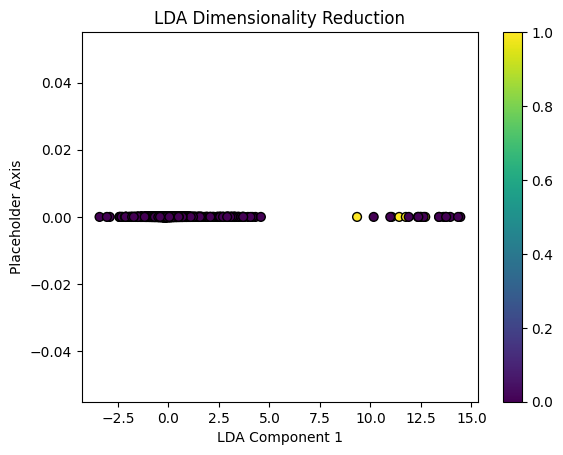

In [33]:
import matplotlib.pyplot as plt

if X_lda.shape[1] == 1:
    # Only one component, so use a single axis for scatter plot
    plt.scatter(X_lda[:, 0], [0] * len(X_lda), c=y, cmap='viridis', edgecolor='k', s=40)
    plt.xlabel('LDA Component 1')
    plt.ylabel('Placeholder Axis')  # Use a placeholder label
else:
    # Two components, so plot normally
    plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=40)
    plt.xlabel('LDA Component 1')
    plt.ylabel('LDA Component 2')

plt.title('LDA Dimensionality Reduction')
plt.colorbar()
plt.show()
